# Project 3: Poisonous Mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 examples, where each describes a mushroom by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. The feature space has been binarized. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using k-means and density estimation with Gaussian mixture models (GMM). Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please **prepare your own write-up and write your own code**.

In [1]:
%matplotlib inline

import urllib.request as urllib2 # For python3
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

In [2]:
MUSHROOM_DATA = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.data'
MUSHROOM_MAP = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.map'

Load feature names.

In [3]:
feature_names = []

for line in urllib2.urlopen(MUSHROOM_MAP):
    [index, name, junk] = line.decode('utf-8').split()
    feature_names.append(name)

print('Loaded feature names: ', len(feature_names))
print(feature_names)

Loaded feature names:  126
['cap-shape=bell', 'cap-shape=conical', 'cap-shape=convex', 'cap-shape=flat', 'cap-shape=knobbed', 'cap-shape=sunken', 'cap-surface=fibrous', 'cap-surface=grooves', 'cap-surface=scaly', 'cap-surface=smooth', 'cap-color=brown', 'cap-color=buff', 'cap-color=cinnamon', 'cap-color=gray', 'cap-color=green', 'cap-color=pink', 'cap-color=purple', 'cap-color=red', 'cap-color=white', 'cap-color=yellow', 'bruises?=bruises', 'bruises?=no', 'odor=almond', 'odor=anise', 'odor=creosote', 'odor=fishy', 'odor=foul', 'odor=musty', 'odor=none', 'odor=pungent', 'odor=spicy', 'gill-attachment=attached', 'gill-attachment=descending', 'gill-attachment=free', 'gill-attachment=notched', 'gill-spacing=close', 'gill-spacing=crowded', 'gill-spacing=distant', 'gill-size=broad', 'gill-size=narrow', 'gill-color=black', 'gill-color=brown', 'gill-color=buff', 'gill-color=chocolate', 'gill-color=gray', 'gill-color=green', 'gill-color=orange', 'gill-color=pink', 'gill-color=purple', 'gill-col

Load data. The dataset is sparse, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [4]:
X, Y = [], []

for line in urllib2.urlopen(MUSHROOM_DATA):
    items = line.decode('utf-8').split()
    Y.append(int(items.pop(0)))
    x = np.zeros(len(feature_names))
    for item in items:
        feature = int(str(item).split(':')[0])
        x[feature] = 1
    X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


### Part 1:

Do a principal components analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50].  Also show a lineplot of fraction of total variance vs. number of principal components, for all possible numbers of principal components.

Notes:
* You can use `PCA` to produce a PCA analysis.

In [5]:
def P1():
### STUDENT START ###

# Doing PCA, varying number of components [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]:

    for k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]:

        pca = PCA(n_components = k)
        pca.fit(train_data)
        
        # Getting how much of the variation is explained by the first K components:
        
        sum_vars = sum(pca.explained_variance_ratio_)
        print("For the first", k, "components, the variance is", round(sum_vars,4))

### STUDENT END ###

P1()

For the first 1 components, the variance is 0.164
For the first 2 components, the variance is 0.2973
For the first 3 components, the variance is 0.399
For the first 4 components, the variance is 0.4696
For the first 5 components, the variance is 0.5083
For the first 10 components, the variance is 0.6522
For the first 20 components, the variance is 0.8089
For the first 30 components, the variance is 0.8985
For the first 40 components, the variance is 0.9509
For the first 50 components, the variance is 0.9821


### Part 2:

PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and show as a square scatterplot. Show the positive (poisonous) examples in red and the negative (non-poisonous) examples in green. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

Notes:
* You can use `PCA` to produce a PCA analysis.

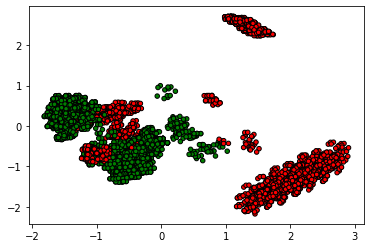

In [6]:
def P2():
### STUDENT START ###

    # Define number of components on PCA, fit/transform training data:

    pca = PCA(n_components = 2)
    transf_data = pca.fit_transform(train_data)

    # Define data structures to hold the desired data:

    scatter_xs = []
    scatter_ys = []
    color = []

    # Going through the training data, collecting positive and negative cases with respective colors:

    for i in range(len(transf_data)):
        scatter_xs.append(transf_data[i][0])
        scatter_ys.append(transf_data[i][1])
        is_poison = train_labels[i]
        if is_poison == 0:
            color.append("green")
        else:
            color.append("red")

    # Creating the plot:

    plt.scatter(scatter_xs, scatter_ys, c=color, edgecolors="black", s=20)
    plt.show()


### STUDENT END ###

P2()

### Part 3:

Fit a k-means cluster model with 6 clusters over the 2d projected data. As in part 2, show as a square scatterplot with the positive (poisonous) examples in red and the negative (non-poisonous) examples in green.  For each cluster, mark the centroid and plot a circle that goes through the cluster's example that is most distant from the centroid.

Notes:
* You can use `KMeans` to produce a k-means cluster analysis.
* You can use `linalg.norm` to determine distance (dissimilarity) between observations.

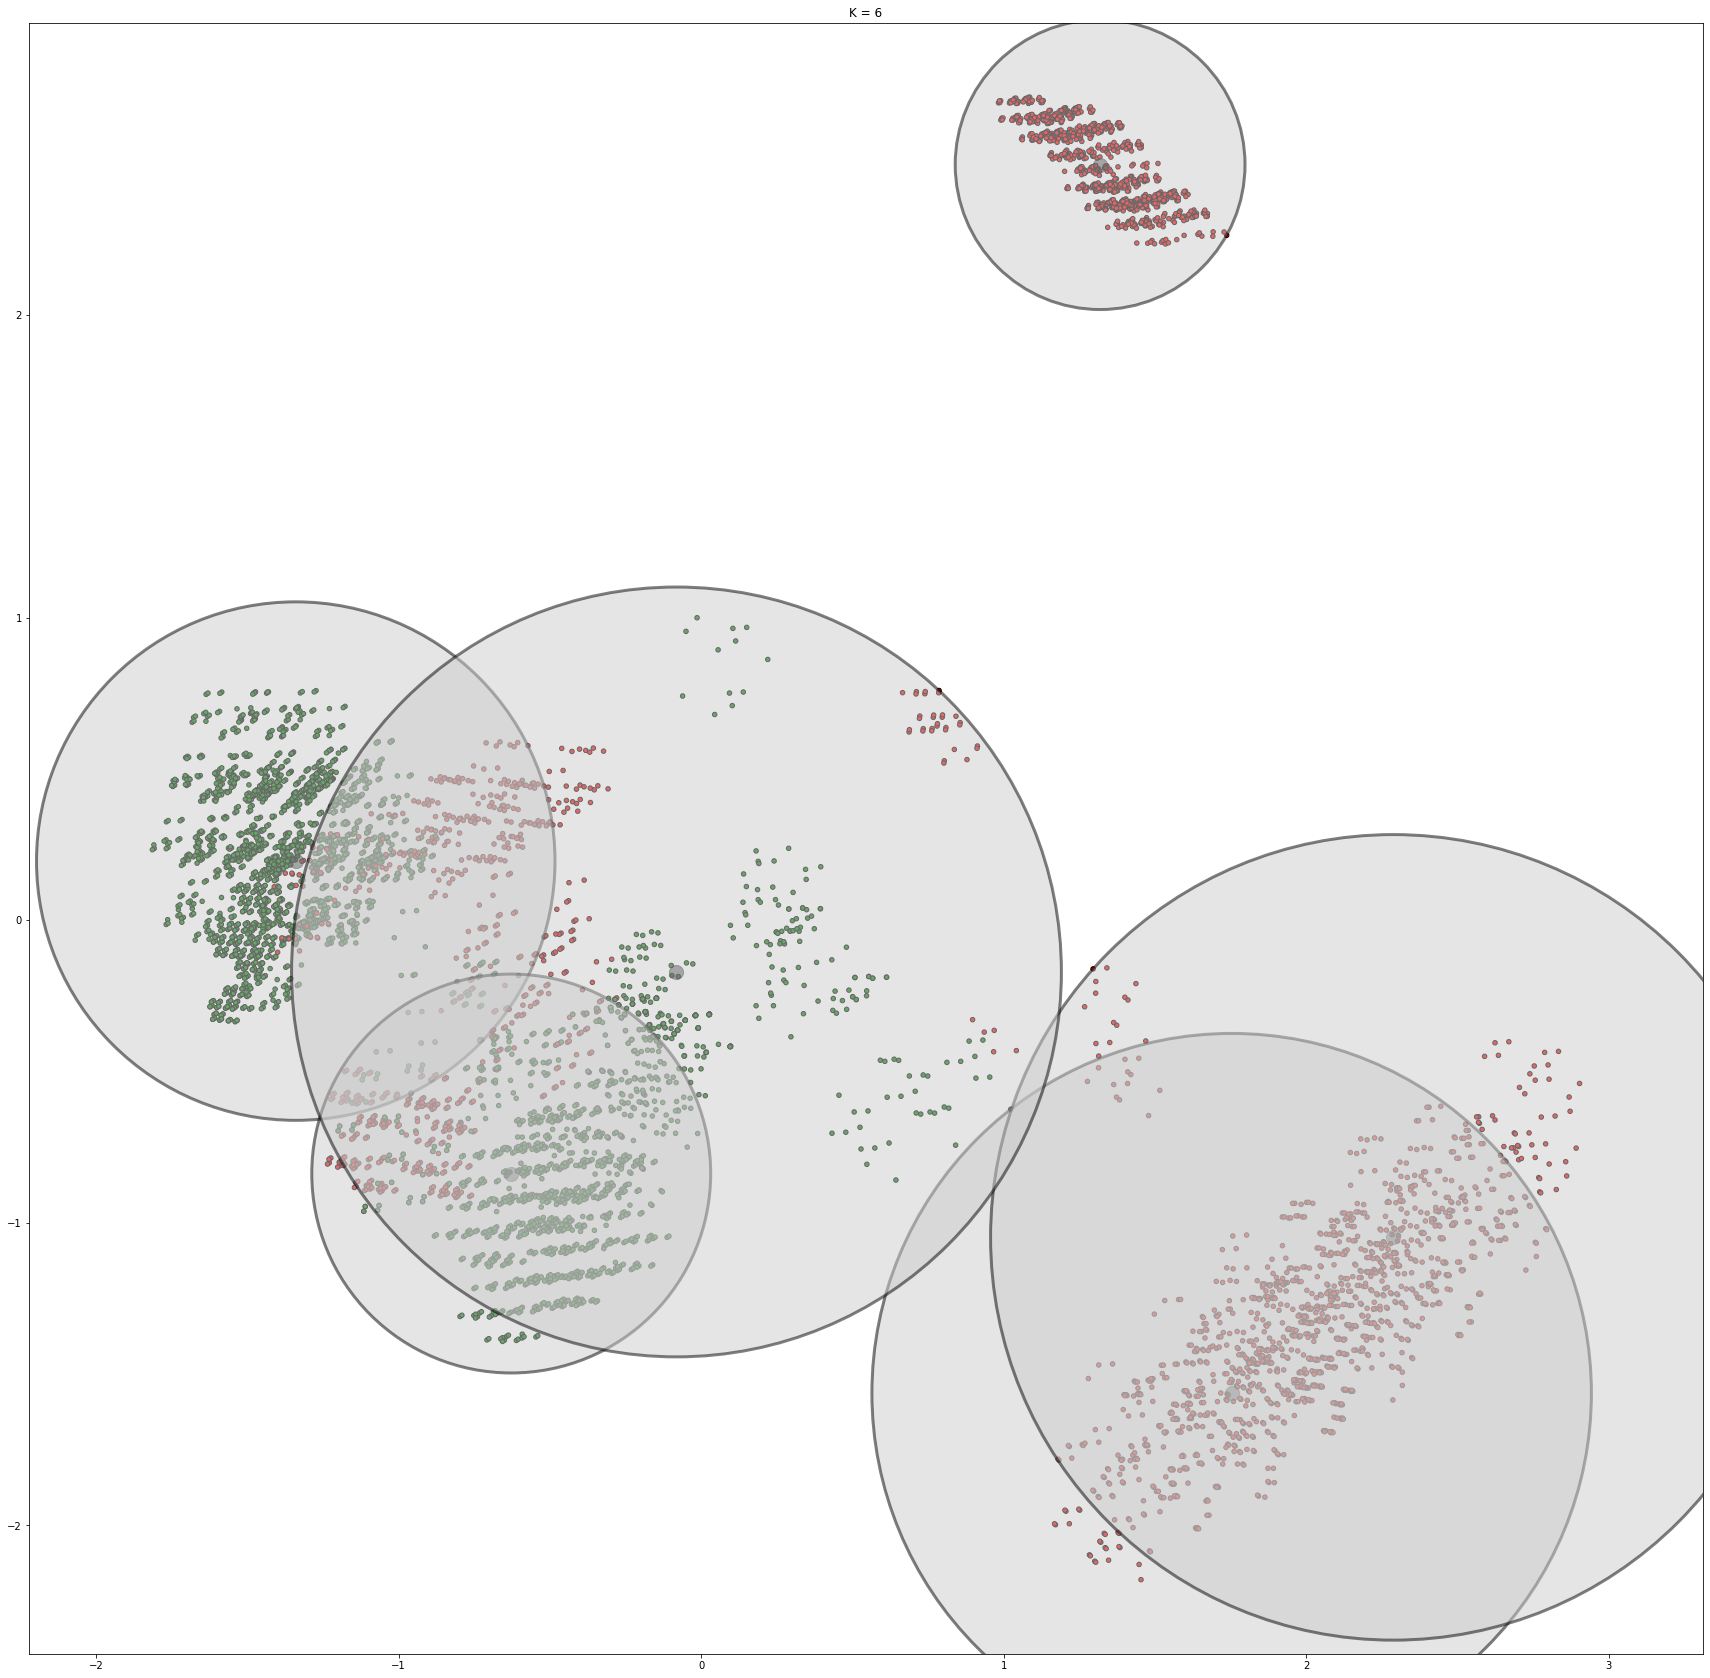

In [7]:
def P3():

### STUDENT START ###

    # Getting the needed library to plot the circles:
    
    from scipy.spatial.distance import cdist

    # Creating 2d projected data:
    
    pca2 = PCA(n_components = 2)
    transf_data = pca2.fit_transform(train_data)

    # Creating the plot figure:
    
    plt.figure(figsize=(30,30))

    # Running KMeans with k = 6:
    
    for k in [6]:

        kmeans = KMeans(n_clusters=k)
        kmeans.fit(transf_data)
        y_kmeans = kmeans.predict(transf_data)
        
    # Going through the training data, collecting positive and negative cases with respective colors:
    
        scatter_xs = []
        scatter_ys = []
        color = []

        for i in range(len(transf_data)):
            scatter_xs.append(transf_data[i][0])
            scatter_ys.append(transf_data[i][1])
            is_poison = train_labels[i]
            if is_poison == 0:
                color.append("green")
            else:
                color.append("red")
            
        # Creating the scatterplots and centroids:
        
        #plt.subplot(4, 4, k)
        plt.title("K = " + str(k))
        plt.scatter(scatter_xs, scatter_ys, c=color, edgecolors="black", s=20, cmap='viridis')
        centers = kmeans.cluster_centers_
        plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

        # Plotting the input data:
        
        ax = None or plt.gca()
        ax.axis('equal')

        # Plotting the circles for every data cluster:

        radii = [cdist(transf_data[y_kmeans == i], [center]).max() for i, center in enumerate(centers)]
        for c, r in zip(centers, radii):
            ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1, ec="black"))

### STUDENT END ###

P3()

### Part 4:

Fit Gaussian mixture models for the positive (poisonous) examples in your 2d projected data. Vary the number of mixture components from 1 to 4 and the covariance matrix type 'spherical', 'diag', 'tied', 'full' (that's 16 models).  Show square plots of the estimated density contours presented in a 4x4 grid - one row each for a number of mixture components and one column each for a convariance matrix type.  

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `contour` in combination with other methods to plot contours, like in this example: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py
* You can use `contour` without the `norm` and `levels` parameters. 

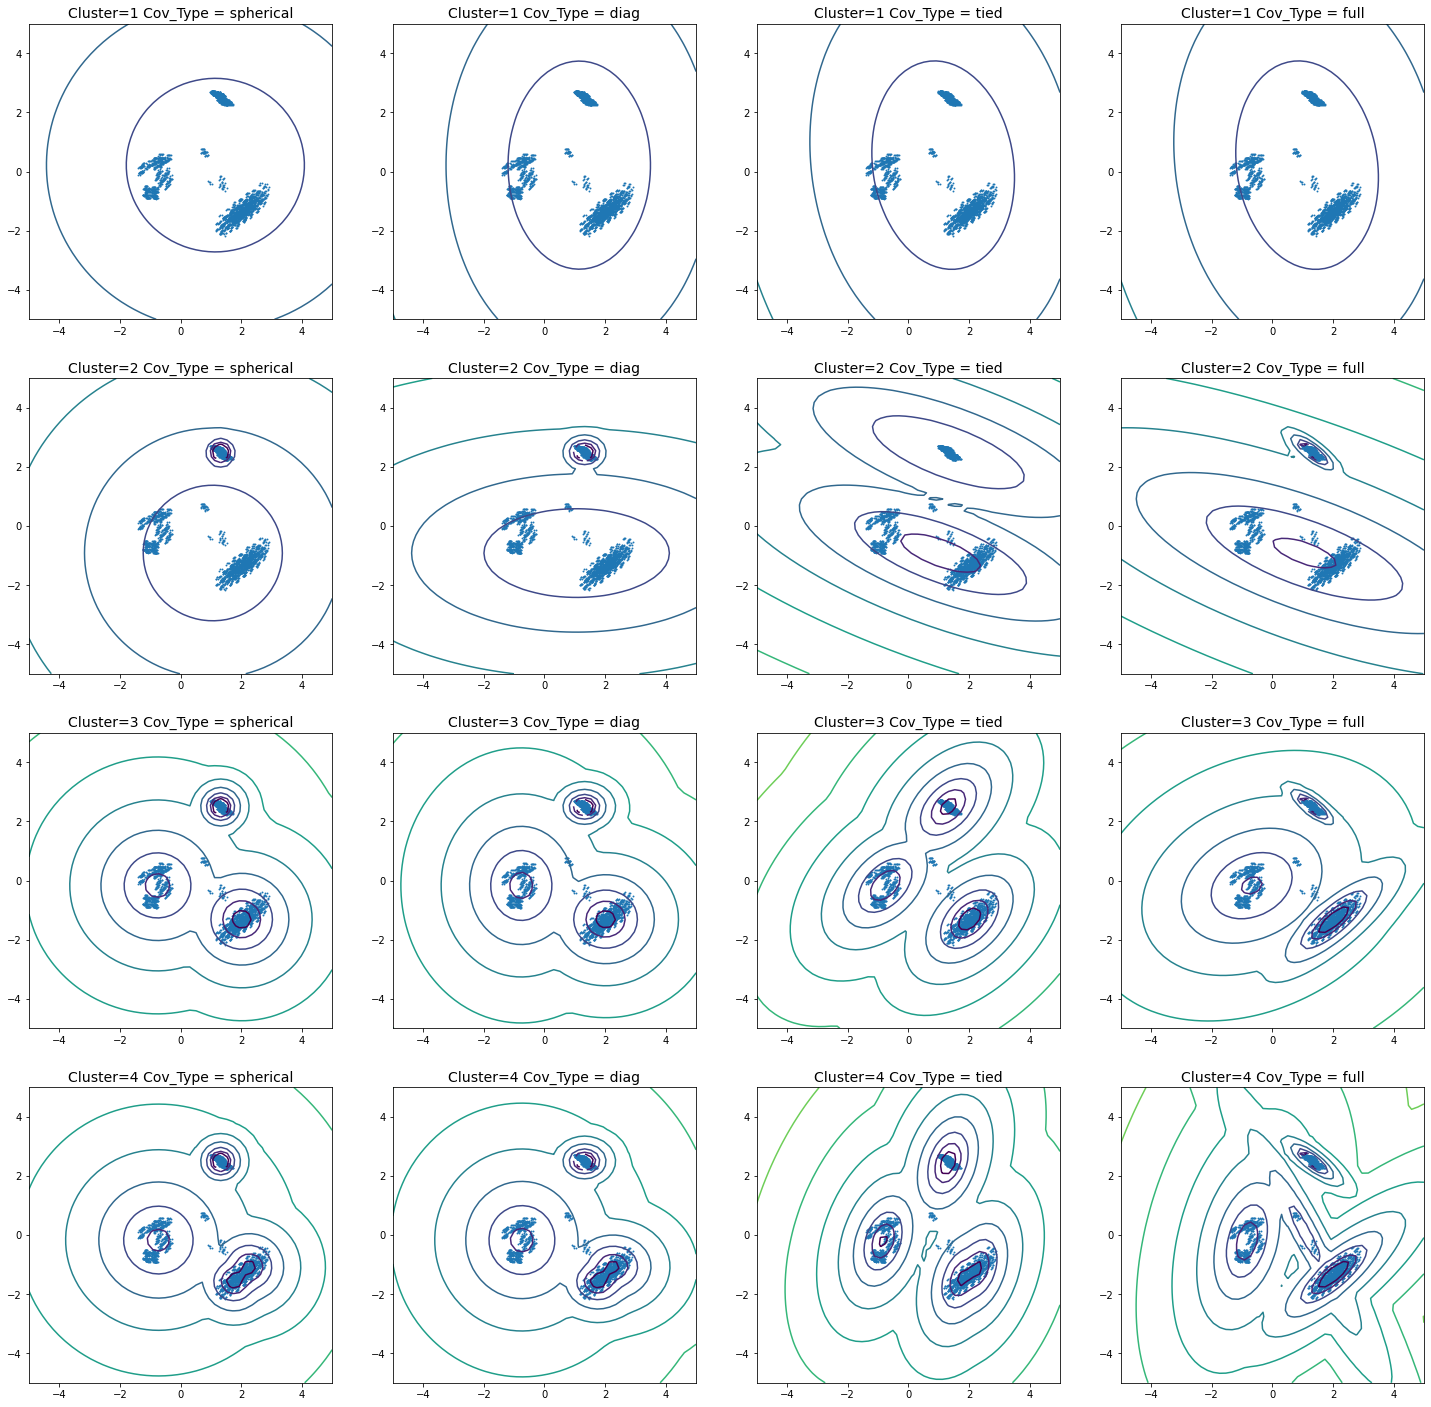

In [8]:
def P4():
### STUDENT START ###
    import warnings
    warnings.filterwarnings('ignore')

    pca3 = PCA(n_components = 2)
    transf_data = pca3.fit_transform(train_data)

    # Getting the positive examples from dataset, saving them in a new data structure:
    
    positives = train_labels == 1
    poisonous = transf_data[positives]
    
    # Creating the plot figure:
    
    plt.figure(figsize=(25,25))
    num=1
    for n in range(1,5):
        
        col=0
        for cov_type in ['spherical', 'diag', 'tied', 'full']:

            # Fitting a GMM changing number of components from 1-4 and covariance type among all 4 types:
            
            clf = GaussianMixture(n_components=n, covariance_type=cov_type, random_state=12345)
            clf.fit(poisonous)

            # Displaying the predicted scores as contour plots:
            
            # 'linspace' was changed here to the best sizes that allows us to view all components:
            
            x = np.linspace(-5., 5.)
            y = np.linspace(-5., 5.)
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T
            Z = -clf.score_samples(XX)
            Z = Z.reshape(X.shape)
            
            plt.subplot(4, 4, num)
            num+=1
            plt.scatter(poisonous[:, 0], poisonous[:, 1], .8)
            CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),levels=np.logspace(0, 3, 10))
            #CB = plt.colorbar(CS, shrink=0.8, extend='both')
            plt.title('Cluster=' + str(n)+' Cov_Type = ' + str(cov_type),fontsize=14,ha='center')

    plt.show()

### STUDENT END ###

P4()

### Part 5:

Fit two Gaussian mixture models, one for the positive examples and one for the negative examples in your 2d projected data. Use 4 mixture components and full convariance for each model.  Predict the test example labels by picking the labels corresponding to the larger of the two models' probabilities.  What is the accuracy of you predictions on the test data?

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `GaussianMixture`'s `score_samples` method to find the probabilities.

In [9]:
def P5():
### STUDENT START ###
# Calling the new 'Compute_Accuracy' function with the desired parameters for PCA component, covariance type
# and GMM component:

    accuracy = Compute_Accuracy(2, 'full', 4)
    print("The accuracy on test data = ", round(accuracy,4))

# Creating a 'Compute_Accuracy' function to automate the process of creating the models and calculating accuracy.
# the same function will be used in P6()
def Compute_Accuracy(pca_comp, cov_type, gmm_comp):

    pca4 = PCA(n_components = pca_comp)
    transf_data = pca4.fit_transform(train_data)
    transf_test_data = pca4.transform(test_data)

    positives = train_labels == 1
    poisonous = transf_data[positives]

    # Fit First Gaussian Mixture Model with 4 components:

    clf2 = GaussianMixture(n_components=gmm_comp, covariance_type=cov_type,random_state=12345)
    clf2.fit(poisonous)

    negatives = train_labels == 0
    non_poisonous = transf_data[negatives]

    # Fit Second Gaussian Mixture Model with 4 components:

    clf3 = GaussianMixture(n_components=gmm_comp,covariance_type=cov_type,random_state=12345)
    clf3.fit(non_poisonous)

    #pca6 = PCA(n_components = pca_comp)
    #transf_test_data = pca6.fit_transform(test_data)

    # Getting probabilities from poisonous and non-poisonous:

    probs_poison = clf2.predict_proba(transf_test_data)[:,1]

    probs_non_poison = clf3.predict_proba(transf_test_data)[:,1]

    results = []

    # Choosing the label for which the model gives higher probability:

    for i in range(len(transf_test_data)):
        pos_score = probs_poison[i]
        neg_score = probs_non_poison[i]
        if pos_score < neg_score:
            results.append(0)
        else:
            # Here we wanted to be cautious: in case probabilities are the same, we assume the mushroom is poisonous.
            results.append(1)

    # Calculates accuracy and returns the result:

    accuracy = metrics.accuracy_score(test_labels, results)
    return accuracy
    
### STUDENT END ###

P5()

The accuracy on test data =  0.677


### Part 6:

Run a series of experiments to find the Gaussian mixture model that results in the best accuracy with no more than 50 parameters.  Do this by varying the number of PCA components, the number of GMM components, and the covariance type.

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.


* For spherical, diag, and full covariance types:
  * number of parameters = (number of parameters per gmm component * number of gmm components - 1) * number of classes
  * number of parameters per gmm component includes all the means plus all the non-zero, non-duplicated values in the covariance matrix plus the mixing weight
  * Each mixing weight parameter indicates how much to weight a particular gmm component; the -1 above accounts for the fact that the mixing weights must sum to 1, so you do not need to include the last mixing weight as its own parameter


* To calculate the number of parameters for tied covariance type:
  * number of parameters = (number of parameters per class - 1) * number of classes
  * number of parameters per class includes all the means and mixing weights for all the gmm components plus all the non-zero, non-duplicated values in the one shared covariance matrix
  * Each mixing weight parameter indicates how much to weight a particular gmm component; the -1 above accounts for the fact that the mixing weights must sum to 1, so you do not need to include the last mixing weight as its own parameter

In [10]:
# Creating a nested 'Compute_Accuracy' function to automate the process of creating the models and calculating accuracy.
def P6():
### STUDENT START ###

    # Assigning variables to hold the best results:
    
    best_pca = 2
    best_cov = 'spherical'
    best_gmm = 2
    best_accuracy = 0
    parameter_n=0

    # Creating loops to iterate through all possible values of PCA components, covariance type and GMM components:
    
    for pca_comp in [5, 10, 20, 30]:
        for cov_type in ['diag', 'tied', 'full']:
            for gmm_comp in range(4,8):

    # Calling 'Compute_Accuracy' function created in Part 5, to re-use code and simplify coding:
                accuracy = Compute_Accuracy(pca_comp, cov_type, gmm_comp)
            
                parameter_n+=1
                print("Current Accuracy = ", round(accuracy,4), "# PCA Comps. = ", pca_comp, "Covariance Type = ", cov_type, "# GMM Comps. = ", gmm_comp)

                # Finding the best accuracy and correspondent PCA comp, cov type and GMM comp:

                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_pca = pca_comp
                    best_cov = cov_type
                    best_gmm = gmm_comp
    
    print("\n", "Total # of Parameter Changes = ", parameter_n)
    print("\n", "The Best Accuracy = ", round(best_accuracy,4), "\n", "The Best # of PCA Components = ", best_pca, "\n", "The Best Covariance Type = ", best_cov, "\n", "The Best # of GMM Components is:", best_gmm)

### STUDENT END ###

P6()

Current Accuracy =  0.6388 # PCA Comps. =  5 Covariance Type =  diag # GMM Comps. =  4
Current Accuracy =  0.6388 # PCA Comps. =  5 Covariance Type =  diag # GMM Comps. =  5
Current Accuracy =  0.5498 # PCA Comps. =  5 Covariance Type =  diag # GMM Comps. =  6
Current Accuracy =  0.548 # PCA Comps. =  5 Covariance Type =  diag # GMM Comps. =  7
Current Accuracy =  0.7473 # PCA Comps. =  5 Covariance Type =  tied # GMM Comps. =  4
Current Accuracy =  0.6423 # PCA Comps. =  5 Covariance Type =  tied # GMM Comps. =  5
Current Accuracy =  0.3781 # PCA Comps. =  5 Covariance Type =  tied # GMM Comps. =  6
Current Accuracy =  0.4128 # PCA Comps. =  5 Covariance Type =  tied # GMM Comps. =  7
Current Accuracy =  0.6423 # PCA Comps. =  5 Covariance Type =  full # GMM Comps. =  4
Current Accuracy =  0.6415 # PCA Comps. =  5 Covariance Type =  full # GMM Comps. =  5
Current Accuracy =  0.6415 # PCA Comps. =  5 Covariance Type =  full # GMM Comps. =  6
Current Accuracy =  0.6415 # PCA Comps. =  5